In [266]:
# ..................................................................................
# algoritmo PSO que maximiza la funcion f(x) = sin(x) + sin(x^2)
# ..................................................................................

import numpy as np

# funcion objetivo hiperboloide eliptico
def funcion_objetivo(x):
    return np.sin(x) + np.sin(x**2)

In [267]:
# parametros
num_particulas = 2  # numero de particulas
dim = 1  # dimensiones
cantidad_iteraciones = 30  # maximo numero de iteraciones
c1 = 1.49  # componente cognitivo
c2 = 1.49  # componente social
w = 0.5  # factor de inercia
limite_inf = 0   # limite inferior de busqueda
limite_sup = 10  # limite superior de busqueda

In [268]:
# inicializacion
particulas = np.random.uniform(limite_inf, limite_sup, (num_particulas, dim))  # posiciones iniciales de las particulas

velocidades = np.zeros((num_particulas, dim))  # inicializacion de la matriz de velocidades en cero

# inicializacion de pbest y gbest
pbest = particulas.copy()  # mejores posiciones personales iniciales

fitness_pbest = np.empty(num_particulas)  # mejores fitness personales iniciales
for i in range(num_particulas):
    fitness_pbest[i] = funcion_objetivo(*particulas[i])

gbest = pbest[np.argmin(fitness_pbest)]  # mejor posicion global inicial
fitness_gbest = np.min(fitness_pbest)  # fitness global inicial

In [270]:
# busqueda
gbests = np.empty((cantidad_iteraciones,2)) #creo este array para almacenar los gbest de cada iteracion
for iteracion in range(cantidad_iteraciones):
    for i in range(num_particulas):  # iteracion sobre cada partícula
        r1, r2 = np.random.rand(), np.random.rand()  # generacion dos numeros aleatorios

        # actualizacion de la velocidad de la particula en cada dimension
        for d in range(dim):
            velocidades[i][d] = (w * velocidades[i][d] + c1 * r1 * (pbest[i][d] - particulas[i][d]) + c2 * r2 * (gbest[d] - particulas[i][d]))

        for d in range(dim):
            particulas[i][d] = particulas[i][d] + velocidades[i][d]  # cctualizacion de la posicion de la particula en cada dimension

            # mantenimiento de las partículas dentro de los limites
            particulas[i][d] = np.clip(particulas[i][d], limite_inf, limite_sup)

        fitness = funcion_objetivo(*particulas[i])  # Evaluacion de la funcion objetivo para la nueva posicion

        # actualizacion el mejor personal
        if fitness > fitness_pbest[i]:
            fitness_pbest[i] = fitness  # actualizacion del mejor fitness personal
            pbest[i] = particulas[i].copy()  # actualizacion de la mejor posicion personal

            # actualizacion del mejor global
            if fitness > fitness_gbest:
                fitness_gbest = fitness  # actualizacion del mejor fitness global
                gbest = particulas[i].copy()  # actualizacion de la mejor posicion global

    # imprimir el mejor global en cada iteracion
    print(f"Iteración {iteracion + 1}: Mejor posición global {gbest}, Valor {fitness_gbest}")
    gbests[iteracion,0] = gbest[0]
    gbests[iteracion,1] = fitness_gbest

# resultado
solucion_optima = gbest  # mejor posicion global final
valor_optimo = fitness_gbest  # mejor fitness global final

print("\nSolucion optima (x):", solucion_optima)
print("Valor optimo:", valor_optimo)

Iteración 1: Mejor posición global [4.78535533], Valor -1.7859072366604747
Iteración 2: Mejor posición global [4.78535533], Valor -1.7859072366604747
Iteración 3: Mejor posición global [4.78535533], Valor -1.7859072366604747
Iteración 4: Mejor posición global [4.78535533], Valor -1.7859072366604747
Iteración 5: Mejor posición global [4.64669796], Valor -0.6090266308799153
Iteración 6: Mejor posición global [4.55862379], Valor -0.052550929143648784
Iteración 7: Mejor posición global [4.53988001], Valor -0.003182849377988295
Iteración 8: Mejor posición global [4.49999626], Valor 0.00799007291537901
Iteración 9: Mejor posición global [4.49999626], Valor 0.00799007291537901
Iteración 10: Mejor posición global [4.52048715], Valor 0.01825229149536234
Iteración 11: Mejor posición global [4.52048715], Valor 0.01825229149536234
Iteración 12: Mejor posición global [4.5180719], Valor 0.01879301037850689
Iteración 13: Mejor posición global [4.5180719], Valor 0.01879301037850689
Iteración 14: Mejor

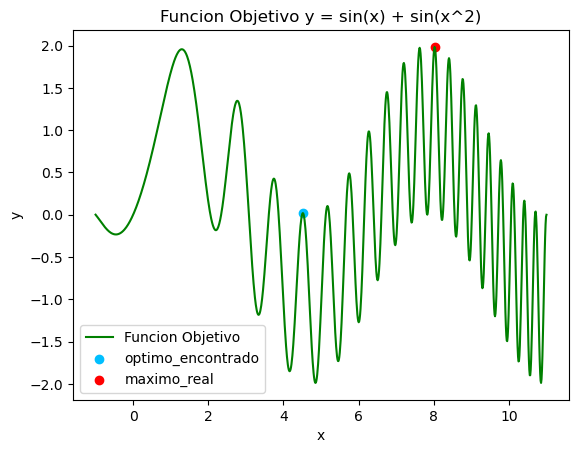

real:  1.9839126084362302
encontrado:  0.018892021782316748


In [271]:
import matplotlib.pyplot as plt


x = np.linspace(-1,11,1000)
y = funcion_objetivo(x)

plt.plot(x,y, color='green', label='Funcion Objetivo')
plt.scatter(solucion_optima, valor_optimo, color='deepskyblue', label='optimo_encontrado')

plt.scatter(x[np.argmax(y)], y.max(), color='red', label='maximo_real')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Funcion Objetivo y = sin(x) + sin(x^2)')
plt.legend()
plt.show()


print('real: ', y.max())
print('encontrado: ', valor_optimo)


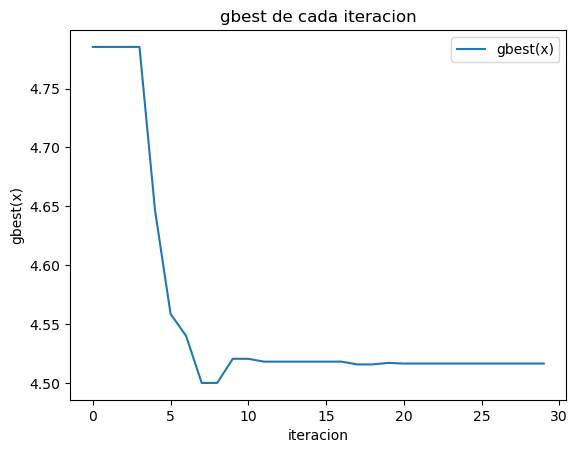

In [272]:
plt.plot(gbests[:,0], label='gbest(x)')
# plt.plot(gbests[:,1], label='fitness_gbest(y)')
plt.title('gbest de cada iteracion')
plt.xlabel('iteracion')
plt.ylabel('gbest(x)')
plt.legend()
plt.show()